In [154]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost

In [155]:
data = pd.read_excel("Train_dataset.xlsx")

In [158]:
data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [226]:
data.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,6592.000000,6592.000000,6592.000000,6592.000000,6.592000e+03,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000
mean,485.855824,24178.278538,54.758324,105.828134,1.045037e+07,5.440532,0.140344,0.038532,33.998134,0.944213,5.019848,571.352102
std,278.273275,19576.291119,25.823716,55.275816,5.689795e+06,1.656532,0.385978,0.013417,34.054964,0.202534,2.626915,422.990361
min,5.310000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,247.397500,11270.150000,32.797500,57.990000,5.607307e+06,4.020000,0.030000,0.027000,1.000000,0.770000,2.770000,224.996705
50%,486.520000,12765.840000,54.675000,106.115000,1.054415e+07,5.445000,0.110000,0.038400,17.700000,0.940000,5.070000,464.160738
75%,723.797500,38182.080000,77.270000,154.445000,1.532381e+07,6.870000,0.230000,0.050300,74.900000,1.120000,7.250000,830.372197
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


In [323]:
data.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [368]:
data.dropna(inplace = True)

In [369]:
data["Industry"].value_counts()

Materials           1361
Energy              1334
Real Estate         1313
Information Tech    1297
Healthcare          1287
Name: Industry, dtype: int64

In [370]:
#Changing the categorical column into one hot encoders 
industry = pd.get_dummies(data['Industry'], drop_first=True)

industry["Stock Index"] = data["Stock Index"]

In [371]:
industry.head()

,Healthcare,Information Tech,Materials,Real Estate,Stock Index
0,0,0,0,1,AA1
3,0,0,1,0,AA4
5,0,0,1,0,AA6
6,1,0,0,0,AA7
8,0,0,1,0,AA9


In [372]:
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

In [373]:
# Keeping essential features 
X_temp = data.drop([ "Index", "Industry", "Stock Price"], axis =  1)

X = pd.merge(X_temp, industry, on="Stock Index",)

X.index = X["Stock Index"]

X = X.drop(["Stock Index"], axis = 1)

In [374]:
X.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate
Stock Index,,,,,,,,,,,,,,,
AA1,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,0,0,0,1
AA4,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,0,0,1,0
AA6,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,0,0,1,0
AA7,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,1,0,0,0
AA9,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,0,0,1,0


In [375]:
X.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate
count,6592.000000,6592.000000,6592.000000,6592.000000,6.592000e+03,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000
mean,485.855824,24178.278538,54.758324,105.828134,1.045037e+07,5.440532,0.140344,0.038532,33.998134,0.944213,5.019848,0.195237,0.196754,0.206462,0.199181
std,278.273275,19576.291119,25.823716,55.275816,5.689795e+06,1.656532,0.385978,0.013417,34.054964,0.202534,2.626915,0.396413,0.397575,0.404797,0.399415
min,5.310000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,0.000000,0.000000,0.000000,0.000000
25%,247.397500,11270.150000,32.797500,57.990000,5.607307e+06,4.020000,0.030000,0.027000,1.000000,0.770000,2.770000,0.000000,0.000000,0.000000,0.000000
50%,486.520000,12765.840000,54.675000,106.115000,1.054415e+07,5.445000,0.110000,0.038400,17.700000,0.940000,5.070000,0.000000,0.000000,0.000000,0.000000
75%,723.797500,38182.080000,77.270000,154.445000,1.532381e+07,6.870000,0.230000,0.050300,74.900000,1.120000,7.250000,0.000000,0.000000,0.000000,0.000000
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1.000000,1.000000,1.000000,1.000000


In [376]:
y = data["Stock Price"]

In [333]:
# For initial Training of the model

# X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# y_train = scaler_y.fit_transform(np.reshape(np.array(y_train), (-1,1)))
# y_test = scaler_y.transform(np.reshape(np.array(y_test), (-1,1)))

In [379]:
#Scaling data 
X = scaler.fit_transform(X)
y = scaler_y.fit_transform(np.reshape(np.array(y), (-1,1)))

In [380]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [381]:
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [382]:
preds = model.predict(X_test)

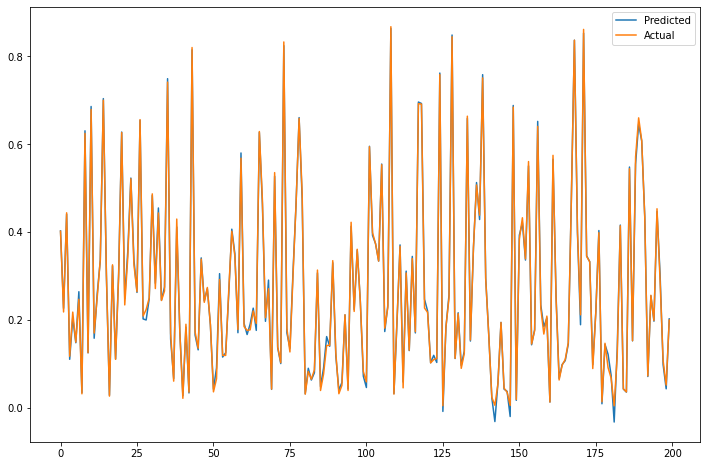

In [383]:
# Vizualizing few prediction along with true values
fig = plt.figure(figsize = (12,8))
plt.plot(preds.reshape(-1,1)[500:700], label = "Predicted")
plt.plot(y_test[500:700], label = "Actual")
plt.legend()

In [250]:
mean_squared_error(y_test, preds)

0.0001076066430484892

## Prediction on 10th

In [ ]:
# Creating dataset for test data
test_data_final = pd.read_excel("Test_dataset.xlsx")

In [385]:
test_data_final.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [386]:
industry_test = pd.get_dummies(test_data_final['Industry'], drop_first=True)

In [387]:
industry_test["Stock Index"] = test_data_final["Stock Index"]

In [388]:
industry_test

,Healthcare,Information Tech,Materials,Real Estate,Stock Index
0,0,0,1,0,AC3235
1,0,0,0,0,AC3236
2,0,1,0,0,AC3237
3,1,0,0,0,AC3238
4,0,0,1,0,AC3239
...,...,...,...,...,...
3326,0,0,0,0,AD2734
3327,0,0,0,0,AD2735
3328,0,0,0,0,AD2736
3329,1,0,0,0,AD2737


In [389]:
X_test_final = test_data_final.drop([ "Index", "Industry"], axis =  1)

X_test_final = pd.merge(X_test_final, industry_test, on="Stock Index")

X_test_final.index = X_test_final["Stock Index"]

X_test_final = X_test_final.drop(["Stock Index"], axis = 1)

X_test_final_trans = scaler.transform(X_test_final)

In [394]:
final_prediction = model.predict(X_test_final_trans)

In [395]:
stock10th = scaler_y.inverse_transform(final_prediction.reshape(-1,1))

In [398]:
pd.DataFrame(stock10th).to_csv("10thres.csv")

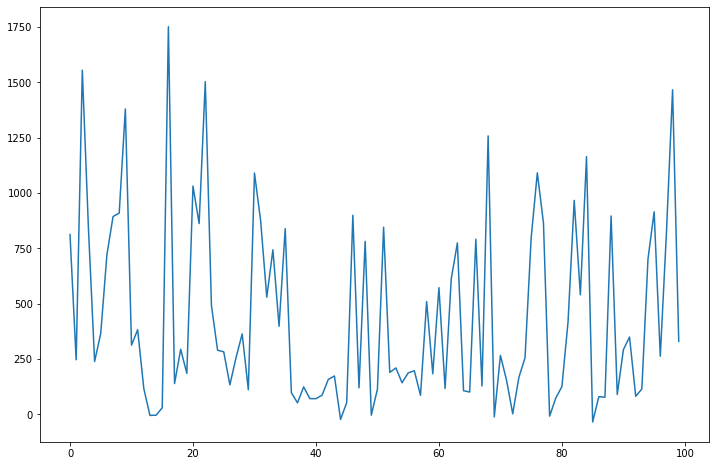

In [446]:
fig = plt.figure(figsize = (12,8))
plt.plot(stock10th.reshape(-1,1)[:100], label = "Predicted")

## Predicting stock for 16th 

In [438]:
testing_data = pd.read_csv("Put_ratio.csv")

In [441]:
# Feeding the predicted put values obtained from LSTM
X_test_final["Put-Call Ratio"] = testing_data["0"].values

In [442]:
X_test_final

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate
Stock Index,,,,,,,,,,,,,,,
AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,1.716733,4.66,0,0,1,0
AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,1.869007,6.11,0,0,0,0
AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,2.030046,4.99,0,1,0,0
AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,2.325979,1.26,1,0,0,0
AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,2.435421,6.18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD2734,121.58,11270.15,11.93,122.28,14034395.0,2.87,0.11,0.0602,74.9,1.869007,7.87,0,0,0,0
AD2735,692.25,38182.08,NaN,NaN,NaN,NaN,0.11,0.0388,74.9,1.254717,0.95,0,0,0,0
AD2736,911.37,11270.15,NaN,NaN,NaN,NaN,0.11,0.0166,74.9,1.346818,7.54,0,0,0,0


In [431]:
X_test_final_trans = scaler.transform(X_test_final)

In [432]:
last_pred = model.predict(X_test_final_trans)

In [434]:
stock16th = scaler_y.inverse_transform(last_pred.reshape(-1,1))

In [437]:
pd.DataFrame(stock16th).to_csv("16thres.csv")

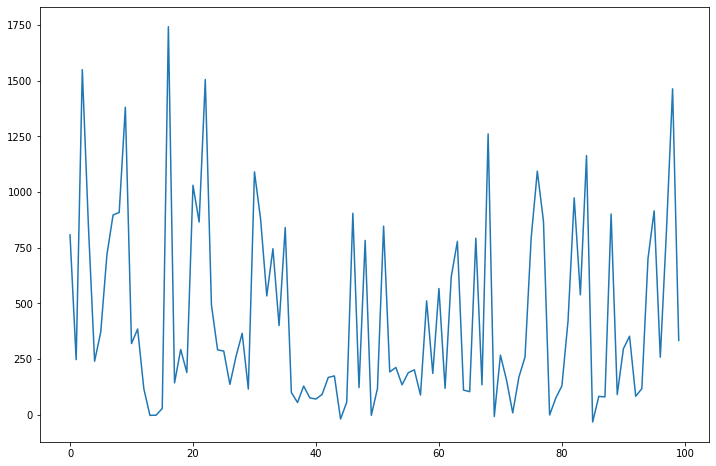

In [445]:
fig = plt.figure(figsize = (12,8))
plt.plot(stock16th.reshape(-1,1)[:100], label = "Predicted")